In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
batch_size = 22
image_size = (56,56)

#src_dir = '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_data/'
dest_dir = '/home/shashank/Desktop/Project_IITD/Painter-by-Numbers/final_train_batches/'

In [3]:
batch_path = os.path.join(dest_dir,"Batch-{}.npz")
train_batch_start_idx = 0
train_batch_end_idx = 49
val_batch_start_idx = 50
val_batch_end_idx = 54
test_batch_start_idx = 55
test_batch_end_idx = 59

In [4]:
def Weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

In [5]:
def Bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [6]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [7]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [8]:
x_pl = tf.placeholder(tf.float32,shape=[None,56,56,3])
y_pl = tf.placeholder(tf.float32,shape=[None,9])

In [9]:
W_conv1 = Weight_variable([5,5,3,32])
B_conv1 = Bias_variable([32])

In [10]:
h_conv1 = tf.nn.relu(conv2d(x_pl,W_conv1)+B_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print h_pool1.shape

(?, 28, 28, 32)


In [11]:
W_conv2 = Weight_variable([5, 5, 32, 64])
B_conv2 = Bias_variable([64])

In [12]:
h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+B_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print h_pool2.shape

(?, 14, 14, 64)


In [13]:
W_conv3 = Weight_variable([5, 5, 64, 128])
B_conv3 = Bias_variable([128])

In [14]:
h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3)+B_conv3)
h_pool3 = max_pool_2x2(h_conv3)
print h_pool3.shape

(?, 7, 7, 128)


In [15]:
W_fc1 = Weight_variable([7 * 7 * 128, 128])
B_fc1 = Bias_variable([128])

h_pool3_flat = tf.reshape(h_pool3, [-1, 7*7*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + B_fc1)
print h_fc1.shape

(?, 128)


In [16]:
W_fc2 = Weight_variable([128, 64])
B_fc2 = Bias_variable([64])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1,W_fc2)+B_fc2)
print h_fc2.shape

(?, 64)


In [17]:
keep_prob = tf.placeholder(tf.float32)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

In [18]:
W_fc3 = Weight_variable([64,9])
B_fc3 = Bias_variable([9])

y_conv = tf.matmul(h_fc2_drop, W_fc3) + B_fc3
print y_conv.shape

(?, 9)


In [19]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_pl, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [20]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_pl, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
train_hist = []
val_hist = []
test_hist = []

In [22]:
max_epochs = 30
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for ex in range(max_epochs):
        print 'epoch number:',ex
        print'-------------------------------------------'
        for train_idx in range(train_batch_start_idx, train_batch_end_idx):
            train = np.load(batch_path.format(train_idx))
            train_step.run(feed_dict={x_pl: train["images"], y_pl : train["labels"], keep_prob : 0.5})
            
        train_accuracy = 0.0
        for train_idx in range(train_batch_start_idx, train_batch_end_idx):
            train = np.load(batch_path.format(train_idx))
            train_accuracy += accuracy.eval(feed_dict={x_pl: train["images"],y_pl:train["labels"],keep_prob : 1.0  })
        train_accuracy /= (train_batch_end_idx - train_batch_start_idx)
        train_hist.append(train_accuracy)
        print 'train accuracy is :',train_accuracy*100,'%'
        
        val_accuracy = 0.0
        for val_idx in range(val_batch_start_idx, val_batch_end_idx):
            val = np.load(batch_path.format(val_idx))
            val_accuracy += accuracy.eval(feed_dict={x_pl: val["images"],y_pl:val["labels"],keep_prob : 1.0  })
        val_accuracy /= (val_batch_end_idx - val_batch_start_idx)
        val_hist.append(val_accuracy)
        print 'validation accuracy is :',val_accuracy*100,'%'
        
        
        test_accuracy = 0.0
        for test_idx in range(test_batch_start_idx, test_batch_end_idx):
            test = np.load(batch_path.format(test_idx))
            test_accuracy += accuracy.eval(feed_dict={x_pl: test["images"],y_pl:test["labels"],keep_prob: 1.0  })
        test_accuracy /= (test_batch_end_idx - test_batch_start_idx)
        test_hist.append(test_accuracy)
        print 'testing accuracy',test_accuracy*100,'%'
        print'--------------------------------------------'

epoch number: 0
-------------------------------------------
train accuracy is : 15.3061228747 %
validation accuracy is : 14.772727713 %
testing accuracy 11.3636367023 %
--------------------------------------------
epoch number: 1
-------------------------------------------
train accuracy is : 19.3877555278 %
validation accuracy is : 21.5909097344 %
testing accuracy 13.6363640428 %
--------------------------------------------
epoch number: 2
-------------------------------------------
train accuracy is : 21.5213362964 %
validation accuracy is : 13.6363640428 %
testing accuracy 20.4545460641 %
--------------------------------------------
epoch number: 3
-------------------------------------------
train accuracy is : 22.0779225838 %
validation accuracy is : 21.5909097344 %
testing accuracy 20.4545460641 %
--------------------------------------------
epoch number: 4
-------------------------------------------
train accuracy is : 29.0352508426 %
validation accuracy is : 26.1363640428 %
test

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

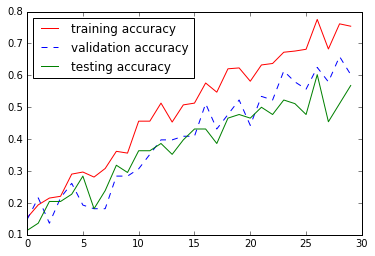

In [24]:
plt.figure(0)
plt.plot(train_hist,'r-',label='training accuracy')
plt.plot(val_hist,'b--',label='validation accuracy')
plt.plot(test_hist,'g-',label='testing accuracy')
plt.legend(loc='best')
plt.show
